Nick Videtti \
IST 718 - Big Data Analytics \
Final Project \
Summer 2023 \
\
&nbsp;&nbsp;&nbsp;&nbsp;The Philadelphia Eagles won the National Football Conference (NFC) Championship during the 2022 NFL season. With this, they earned a spot in the Super Bowl, but ended up losing a close game 38-35 \
against the Kansas City Chiefs. While the Eagles have had a great offseason since that loss, including high profile trades, signings, and draftees, they lost their two main assistant coaches, both of \
whom took on roles as head coaches of other teams. Historically, teams that lose both the Super Bowl and good assistant coaches fail to reach the high expectations they have set for themselves the \
following season. Will that be the fate of the Eagles 2023 season, or is there still reason to believe that they will bounce back from the loss and be better than ever this Fall? \
\
&nbsp;&nbsp;&nbsp;&nbsp;Using data from the well-known and reliable site Pro Football Reference (https://www.pro-football-reference.com/), all Super Bowl matchups and all year-by-year season statistics throughout team history \
for all 32 NFL teams will be downloaded, read, cleaned, joined, analyzed, aggregated, visualized, and whatever else may be required to find the answer to this question, as well as other analysis \
regarding both Super Bowl losing teams and predictions for the upcoming season in 2023. \
\
Notable Fields in Super Bowl Data \
&nbsp;&nbsp;&nbsp;&nbsp;- Winning Team \
&nbsp;&nbsp;&nbsp;&nbsp;- Losing Team \
&nbsp;&nbsp;&nbsp;&nbsp;- Score \
&nbsp;&nbsp;&nbsp;&nbsp;- Year / Season \
\
Notable Fields in Team History Data \
&nbsp;&nbsp;&nbsp;&nbsp;- Season \
&nbsp;&nbsp;&nbsp;&nbsp;- Wins / Losses / Ties \
&nbsp;&nbsp;&nbsp;&nbsp;- Playoff Success \
&nbsp;&nbsp;&nbsp;&nbsp;- Point Differential \
&nbsp;&nbsp;&nbsp;&nbsp;- Standing in Division \
&nbsp;&nbsp;&nbsp;&nbsp;- Offensive Ranking / Defensive Ranking \
&nbsp;&nbsp;&nbsp;&nbsp;- Yards \
\
&nbsp;&nbsp;&nbsp;&nbsp;Pandas DataFrames, Seaborn/PyPlot visualizations, and SciKit Learn Algorithms will be used in this project.

This project will use the OSEMiN Data Science life cycle that was used in all of the lab activities throughout the course. \
The general summary of tasks/analyses for this project will be as follows. \
&nbsp;&nbsp;&nbsp;&nbsp;- O and S (Obtain / Scrub): Read in Super Bowl data and team season data. Then, clean, transform, validate, combine, filter, and sort data to ensure they are ready for initial analysis. \
&nbsp;&nbsp;&nbsp;&nbsp;- E (Explore): Perform Exploratory Data Analysis via aggregation and visualization. \
&nbsp;&nbsp;&nbsp;&nbsp;- M (Model): Create predictive models, test accuaracy, create functions, test out using models/functions. \
&nbsp;&nbsp;&nbsp;&nbsp;- iN (iNterpret): Utlize models, functions, and other data analysis to present meaningful insights and answer questions of interest.

Obtain / Scrub

First, data will need to be read into Pandas DataFrames. The Super Bowl data will be downloaded into a CSV file from https://www.pro-football-reference.com/super-bowl/. \
The team seasons data will be dwnloaded into 32 CSV files, one for each team, from links similar to https://www.pro-football-reference.com/teams/phi/index.htm. \
These files exclusively will be saved in a folder for team seasons data.

We will start with the Super Bowl data. The user will be prompted to select the data file from the location where it was downloaded and the data will be saved into a pandas DataFrame.

In [1]:
import tkinter.filedialog
import pandas

super_bowl_data = pandas.read_csv(tkinter.filedialog.askopenfile(title = 'Please Select Data File for Super Bowl Data...').name)

Now, transformations will be needed for the Super Bowl data. This will include updating column headers, changing data types, changing team names that may be different to the most recent team name, and more. \
Once this is complete, the first few rows of data will be displayed. \
There will also be data validation to ensure there are no missing values, that each columns has one and only one data type, and that the one data type is the most desireable data type.

In [2]:
super_bowl_data.index = super_bowl_data['SB'].str.slice(-3).str.replace('(', '').str.replace(')', '').str.strip().astype(int)
super_bowl_data = super_bowl_data.sort_index()
super_bowl_data.insert(value = super_bowl_data['Date'].str.slice(-4).astype(int) - 1, column = 'Season', loc = 1)
super_bowl_data = super_bowl_data[['Season', 'Winner', 'Loser', 'Pts', 'Pts.1']].rename(columns = {'Pts': 'WinningScore', 'Pts.1': 'LosingScore'})
super_bowl_data['WinningScore'] = super_bowl_data['WinningScore'].astype(int)
super_bowl_data['LosingScore'] = super_bowl_data['LosingScore'].astype(int)
super_bowl_data['Differential'] = super_bowl_data['WinningScore'] - super_bowl_data['LosingScore']
super_bowl_data['NextSeason'] = super_bowl_data['Season'] + 1
super_bowl_data['Winner'] = [team[-1] for team in super_bowl_data['Winner'].str.replace('Redskins', 'Commanders').str.split()]
super_bowl_data['Loser'] = [team[-1] for team in super_bowl_data['Loser'].str.replace('Redskins', 'Commanders').str.split()]

super_bowl_data.head()

,Season,Winner,Loser,WinningScore,LosingScore,Differential,NextSeason
SB,,,,,,,
1,1966,Packers,Chiefs,35,10,25,1967
2,1967,Packers,Raiders,33,14,19,1968
3,1968,Jets,Colts,16,7,9,1969
4,1969,Chiefs,Vikings,23,7,16,1970
5,1970,Colts,Cowboys,16,13,3,1971


In [3]:
print('Indices:', super_bowl_data.index.isna().sum(), 'Missing Values')

for column in super_bowl_data.columns:
    print(column + ' Column:', super_bowl_data[column].isna().sum(), 'Missing Values')

Indices: 0 Missing Values
Season Column: 0 Missing Values
Winner Column: 0 Missing Values
Loser Column: 0 Missing Values
WinningScore Column: 0 Missing Values
LosingScore Column: 0 Missing Values
Differential Column: 0 Missing Values
NextSeason Column: 0 Missing Values


In [4]:
print('Indices:', set([type(index) for index in super_bowl_data.index]), ' -', len(set([type(index) for index in super_bowl_data.index.tolist()])), 'Distinct Data Types')

for column in super_bowl_data.columns:
    print(column + ' Column:', set([type(value) for value in super_bowl_data[column]]), ' -', len(set([type(value) for value in super_bowl_data[column]])), 'Distinct Data Types')

Indices: {<class 'int'>}  - 1 Distinct Data Types
Season Column: {<class 'int'>}  - 1 Distinct Data Types
Winner Column: {<class 'str'>}  - 1 Distinct Data Types
Loser Column: {<class 'str'>}  - 1 Distinct Data Types
WinningScore Column: {<class 'int'>}  - 1 Distinct Data Types
LosingScore Column: {<class 'int'>}  - 1 Distinct Data Types
Differential Column: {<class 'int'>}  - 1 Distinct Data Types
NextSeason Column: {<class 'int'>}  - 1 Distinct Data Types


Everything looks great! Initial load, transformations, and validation have been completed for the Super Bowl data.

Now, it is time to repeat the process for the team seasons data. Since all of these files are in the same folder, the user will be prompted to select the folder where all these data are. \
These data will be read into a pandas DataFrame that will be appended with each file's data until all 32 files have been read to the DataFrame.

In [5]:
import os
teamfolder = tkinter.filedialog.askdirectory(title = 'Please Select Folder Containing Team Data...')
teamfiles = [teamfolder + '/' + file for file in os.listdir(teamfolder)]

for i in range(len(teamfiles)):
    team_data = pandas.read_csv(teamfiles[i], header = None)
    team_data.columns = [str(team_data.iloc[0, column]) + ' - ' + str(team_data.iloc[1, column]) for column in team_data.columns]
    team_data = team_data[2:].reset_index(drop = True)
    team_data['nan - Tm'] = teamfiles[i].split('/')[-1][:-4]
    if i == 0: team_seasons = team_data
    else: team_seasons = pandas.concat([team_seasons, team_data])

team_seasons

,nan - Year,nan - Lg,nan - Tm,nan - W,nan - L,nan - T,nan - Div. Finish,nan - Playoffs,Points - PF,Points - PA,...,Def Rank - Yds,Overall Rank - T/G,Overall Rank - Pts±,Overall Rank - Yds±,Overall Rank - out of,Simple Rating System - MoV,Simple Rating System - SoS,Simple Rating System - SRS,Simple Rating System - OSRS,Simple Rating System - DSRS
0,2022,NFL,49ers,13,4,0,1st of 4,Lost Conf,450,277,...,1,1,2,4,32,10.2,-2.3,7.9,3.3,4.6
1,2021,NFL,49ers,10,7,0,3rd of 4,Lost Conf,427,365,...,3,22,12,3,32,3.6,0.1,3.8,1.8,1.9
2,2020,NFL,49ers,6,10,0,4th of 4,NaN,376,390,...,5,30,17,5,32,-0.9,1.7,0.8,0.2,0.7
3,2019,NFL,49ers,13,3,0,1st of 4,Lost SB,479,310,...,2,10,3,3,32,10.6,0.4,11.0,6.7,4.3
4,2018,NFL,49ers,4,12,0,3rd of 4,NaN,342,435,...,13,32,27,16,32,-5.8,0.3,-5.5,-2.5,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1965,NFL,Vikings,7,7,0,5th of 7,NaN,383,403,...,7,11,9,4,14,-1.4,6.5,5.1,7.9,-2.8
58,1964,NFL,Vikings,8,5,1,2nd of 7,NaN,355,296,...,10,5,4,5,14,4.2,1.6,5.8,4.6,1.1
59,1963,NFL,Vikings,5,8,1,4th of 7,NaN,309,390,...,9,4,10,10,14,-5.8,0.4,-5.4,1.7,-7.1
60,1962,NFL,Vikings,2,11,1,6th of 7,NaN,254,410,...,12,13,14,13,14,-11.1,4.4,-6.7,-0.8,-6.0


Data have been successfully read in, but now it seems changing the column headers will take a little more elbow grease than it did for the Super Bowl data. \
Let's first take a look at each column header to see which ones need to be changed.

In [6]:
for column in team_seasons.columns: print(column)

nan - Year
nan - Lg
nan - Tm
nan - W
nan - L
nan - T
nan - Div. Finish
nan - Playoffs
Points - PF
Points - PA
Points - PD
nan - Coaches
Top Players - AV
Top Players - Passer
Top Players - Rusher
Top Players - Receiver
Off Rank - Pts
Off Rank - Yds
Def Rank - Pts
Def Rank - Yds
Overall Rank - T/G
Overall Rank - Pts±
Overall Rank - Yds±
Overall Rank - out of
Simple Rating System - MoV
Simple Rating System - SoS
Simple Rating System - SRS
Simple Rating System - OSRS
Simple Rating System - DSRS


This is a good time to also filter out any columns that will not be needed for this project. \
That, along with the same type of initial transformations with the Super Bowl data, will be completed. \
After that, the updated DataFrame will be displayed.

In [7]:
team_seasons = team_seasons[[column for column in team_seasons.columns if column[:3] in ('nan', 'Poi', 'Off', 'Def') and not column in ('nan - Lg', 'nan - Coaches')]]
team_seasons.columns = [(column.split('-'))[-1].strip() if column[:3] in ('nan', 'Poi') else column.replace('-', '').replace(' ', '') for column in team_seasons.columns]
team_seasons = team_seasons.rename(columns = {'Tm': 'Team', 'W': 'Wins', 'L': 'Losses', 'T': 'Ties', 'PF': 'PointsFor', 'PA': 'PointsAllowed', 'PD': 'PointDifferential'})
team_seasons['Team'] = [team[-1] for team in team_seasons['Team'].str.replace('Redskins', 'Commanders').str.replace('*', '').str.split()]

team_seasons

,Year,Team,Wins,Losses,Ties,Div. Finish,Playoffs,PointsFor,PointsAllowed,PointDifferential,OffRankPts,OffRankYds,DefRankPts,DefRankYds
0,2022,49ers,13,4,0,1st of 4,Lost Conf,450,277,173,6,5,1,1
1,2021,49ers,10,7,0,3rd of 4,Lost Conf,427,365,62,13,7,9,3
2,2020,49ers,6,10,0,4th of 4,NaN,376,390,-14,21,15,17,5
3,2019,49ers,13,3,0,1st of 4,Lost SB,479,310,169,2,4,8,2
4,2018,49ers,4,12,0,3rd of 4,NaN,342,435,-93,21,16,28,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1965,Vikings,7,7,0,5th of 7,NaN,383,403,-20,4,4,14,7
58,1964,Vikings,8,5,1,2nd of 7,NaN,355,296,59,4,6,6,10
59,1963,Vikings,5,8,1,4th of 7,NaN,309,390,-81,8,11,12,9
60,1962,Vikings,2,11,1,6th of 7,NaN,254,410,-156,13,12,14,12


Looks great! Next will be the data validation. \
Just like the Super Bowl data, columns will be checked for missing values, checked to see if there is one and only one data type, and chcked to see that the one data type is the most desireable for that column.

In [8]:
print('Indices:', team_seasons.index.isna().sum(), 'Missing Values')

for column in team_seasons.columns:
    print(column + ' Column:', team_seasons[column].isna().sum(), 'Missing Values')

Indices: 0 Missing Values
Year Column: 0 Missing Values
Team Column: 0 Missing Values
Wins Column: 0 Missing Values
Losses Column: 0 Missing Values
Ties Column: 0 Missing Values
Div. Finish Column: 0 Missing Values
Playoffs Column: 1409 Missing Values
PointsFor Column: 0 Missing Values
PointsAllowed Column: 0 Missing Values
PointDifferential Column: 0 Missing Values
OffRankPts Column: 0 Missing Values
OffRankYds Column: 0 Missing Values
DefRankPts Column: 0 Missing Values
DefRankYds Column: 0 Missing Values


Looks like we need to investigate what is happening in the "Playoffs" column. \
We will first see what distinct values are in the column.

In [9]:
set(team_seasons['Playoffs'])

{'Lost Champ',
 'Lost Conf',
 'Lost Div',
 'Lost SB',
 'Lost WC',
 'Won Champ',
 'Won SB',
 nan}

It appears that all possibilities have been covered except for missing the playoffs. We will have to assume that missing values indicate that the team missed the playoffs that season. \
This will be corrected, then the missing values validation will be repeated.

In [10]:
team_seasons['Playoffs'] = team_seasons['Playoffs'].fillna('Missed')

print('Indices:', team_seasons.index.isna().sum(), 'Missing Values')

for column in team_seasons.columns:
    print(column + ' Column:', team_seasons[column].isna().sum(), 'Missing Values')

Indices: 0 Missing Values
Year Column: 0 Missing Values
Team Column: 0 Missing Values
Wins Column: 0 Missing Values
Losses Column: 0 Missing Values
Ties Column: 0 Missing Values
Div. Finish Column: 0 Missing Values
Playoffs Column: 0 Missing Values
PointsFor Column: 0 Missing Values
PointsAllowed Column: 0 Missing Values
PointDifferential Column: 0 Missing Values
OffRankPts Column: 0 Missing Values
OffRankYds Column: 0 Missing Values
DefRankPts Column: 0 Missing Values
DefRankYds Column: 0 Missing Values


Looks great! Now, time for the data types validation.

In [11]:
print('Indices:', set([type(index) for index in team_seasons.index]), ' -', len(set([type(index) for index in team_seasons.index])), 'Distinct Data Types')

for column in team_seasons.columns:
    print(column + ' Column:', set([type(value) for value in team_seasons[column]]), ' -', len(set([type(value) for value in team_seasons[column]])), 'Distinct Data Types')

Indices: {<class 'int'>}  - 1 Distinct Data Types
Year Column: {<class 'str'>}  - 1 Distinct Data Types
Team Column: {<class 'str'>}  - 1 Distinct Data Types
Wins Column: {<class 'str'>}  - 1 Distinct Data Types
Losses Column: {<class 'str'>}  - 1 Distinct Data Types
Ties Column: {<class 'str'>}  - 1 Distinct Data Types
Div. Finish Column: {<class 'str'>}  - 1 Distinct Data Types
Playoffs Column: {<class 'str'>}  - 1 Distinct Data Types
PointsFor Column: {<class 'str'>}  - 1 Distinct Data Types
PointsAllowed Column: {<class 'str'>}  - 1 Distinct Data Types
PointDifferential Column: {<class 'str'>}  - 1 Distinct Data Types
OffRankPts Column: {<class 'str'>}  - 1 Distinct Data Types
OffRankYds Column: {<class 'str'>}  - 1 Distinct Data Types
DefRankPts Column: {<class 'str'>}  - 1 Distinct Data Types
DefRankYds Column: {<class 'str'>}  - 1 Distinct Data Types


While there is one and only one data type in every column, they are not necessarily the most desireable data type. \
We will correct for that and then repeat the data types validation.

In [12]:
team_seasons['Year'] = team_seasons['Year'].astype(int)
team_seasons['Wins'] = team_seasons['Wins'].astype(int)
team_seasons['Losses'] = team_seasons['Losses'].astype(int)
team_seasons['Ties'] = team_seasons['Ties'].astype(int)
team_seasons['PointsFor'] = team_seasons['PointsFor'].astype(int)
team_seasons['PointsAllowed'] = team_seasons['PointsAllowed'].astype(int)
team_seasons['PointDifferential'] = team_seasons['PointDifferential'].astype(int)
team_seasons['OffRankPts'] = team_seasons['OffRankPts'].astype(int)
team_seasons['OffRankYds'] = team_seasons['OffRankYds'].astype(int)
team_seasons['DefRankPts'] = team_seasons['DefRankPts'].astype(int)
team_seasons['DefRankYds'] = team_seasons['DefRankYds'].astype(int)


print('Indices:', set([type(index) for index in team_seasons.index]), '-', len(set([type(index) for index in team_seasons.index])), 'Distinct Data Types')

for column in team_seasons.columns:
    print(column + ' Column:', set([type(value) for value in team_seasons[column]]), '-', len(set([type(value) for value in team_seasons[column]])), 'Distinct Data Types')

Indices: {<class 'int'>} - 1 Distinct Data Types
Year Column: {<class 'int'>} - 1 Distinct Data Types
Team Column: {<class 'str'>} - 1 Distinct Data Types
Wins Column: {<class 'int'>} - 1 Distinct Data Types
Losses Column: {<class 'int'>} - 1 Distinct Data Types
Ties Column: {<class 'int'>} - 1 Distinct Data Types
Div. Finish Column: {<class 'str'>} - 1 Distinct Data Types
Playoffs Column: {<class 'str'>} - 1 Distinct Data Types
PointsFor Column: {<class 'int'>} - 1 Distinct Data Types
PointsAllowed Column: {<class 'int'>} - 1 Distinct Data Types
PointDifferential Column: {<class 'int'>} - 1 Distinct Data Types
OffRankPts Column: {<class 'int'>} - 1 Distinct Data Types
OffRankYds Column: {<class 'int'>} - 1 Distinct Data Types
DefRankPts Column: {<class 'int'>} - 1 Distinct Data Types
DefRankYds Column: {<class 'int'>} - 1 Distinct Data Types


Perfect!! \
The next step is to join these cleaned and validated DataFrames together such that only seasons that correspond to the season after a Super Bowl loss are included. \
Once that is complete, the first few rows of data will be displayed.

In [13]:
sb_losers = super_bowl_data \
                .merge(team_seasons, how = 'inner', left_on = ['Loser', 'Season'], right_on = ['Team', 'Year']) \
                .merge(team_seasons, how = 'left', left_on = ['Loser', 'NextSeason'], right_on = ['Team', 'Year'])

sb_losers.columns = [column.replace('_x', '') if column[-2:] == '_x' else 'Next' + column.replace('_y', '') if column[-2:] == '_y' else column for column in sb_losers.columns]

for column in sb_losers.columns: 
    if column[:4] == 'Next' and sb_losers.dtypes[column] == float: sb_losers[column] = sb_losers[column].fillna(0).astype(int)
    else: sb_losers[column] = sb_losers[column].fillna('None')

sb_losers.head()

,Season,Winner,Loser,WinningScore,LosingScore,Differential,NextSeason,Year,Team,Wins,...,NextTies,NextDiv. Finish,NextPlayoffs,NextPointsFor,NextPointsAllowed,NextPointDifferential,NextOffRankPts,NextOffRankYds,NextDefRankPts,NextDefRankYds
0,1966,Packers,Chiefs,35,10,25,1967,1966,Chiefs,11,...,0,2nd of 4,Missed,408,254,154,2,4,3,4
1,1967,Packers,Raiders,33,14,19,1968,1967,Raiders,13,...,0,1st of 5,Lost Conf,453,233,220,1,1,2,3
2,1968,Jets,Colts,16,7,9,1969,1968,Colts,13,...,1,2nd of 4,Missed,279,268,11,8,4,6,13
3,1969,Chiefs,Vikings,23,7,16,1970,1969,Vikings,12,...,0,1st of 4,Lost Div,335,143,192,3,19,1,1
4,1970,Colts,Cowboys,16,13,3,1971,1970,Cowboys,10,...,0,1st of 5,Won SB,406,222,184,1,1,7,3


Looks good! \
Next is, once again, data validation!! \
Both the missing values and data types validations that were performed for the first two DataFrames will be performed for this combined and filtered DataFrame.

In [14]:
print('Indices:', sb_losers.index.isna().sum(), 'Missing Values')
print('Missing Values in All Columns:', sb_losers.isna().sum().sum())
print('Columns with Missing Values:')
for column in sb_losers.columns:
    if sb_losers[column].isna().sum() != 0:
        print(column + ' Column:', sb_losers[column].isna().sum(), 'Missing Values')

Indices: 0 Missing Values
Missing Values in All Columns: 0
Columns with Missing Values:


In [15]:
print('Indices:', set([type(index) for index in sb_losers.index]), '-', len(set([type(index) for index in sb_losers.index])), 'Distinct Data Types')

print('Columns with Multiple Data Types:')
for column in sb_losers.columns:
    if len(set([type(value) for value in sb_losers[column]])) != 1:
        print(column + ' Column:', set([type(value) for value in sb_losers[column]]), '-', len(set([type(value) for value in sb_losers[column]])), 'Distinct Data Types')

Indices: {<class 'int'>} - 1 Distinct Data Types
Columns with Multiple Data Types:


In [16]:
for dtype in set(sb_losers.dtypes.values):
    if dtype == int:
        print('int', len([column for column in sb_losers.columns if sb_losers.dtypes[column] == int]), 'Columns')
        print([column for column in sb_losers.columns if sb_losers.dtypes[column] == int])
    else:
        print('Non-int', len([column for column in sb_losers.columns if sb_losers.dtypes[column] != int]), 'Columns')
        print([column for column in sb_losers.columns if sb_losers.dtypes[column] != int])

int 27 Columns
['Season', 'WinningScore', 'LosingScore', 'Differential', 'NextSeason', 'Year', 'Wins', 'Losses', 'Ties', 'PointsFor', 'PointsAllowed', 'PointDifferential', 'OffRankPts', 'OffRankYds', 'DefRankPts', 'DefRankYds', 'NextYear', 'NextWins', 'NextLosses', 'NextTies', 'NextPointsFor', 'NextPointsAllowed', 'NextPointDifferential', 'NextOffRankPts', 'NextOffRankYds', 'NextDefRankPts', 'NextDefRankYds']
Non-int 8 Columns
['Winner', 'Loser', 'Team', 'Div. Finish', 'Playoffs', 'NextTeam', 'NextDiv. Finish', 'NextPlayoffs']


Everything looks great!! While other data cleaning, aggregations, and transformations may be needed for analysis and modeling, we do have analysis-ready data at a base level.

----------End of Obtain / Scrub----------

Explore

Now, it is time for some exploratory data analysis, or EDA. This will give us a feel of the data and answer some initial data-related questions that we have. \
These visualizations will use both Seaborn and Matplotlib's PyPlot.

First, we will look at the playoff success (or in some cases, lack thereof) for teams in the season following a Super Bowl loss.

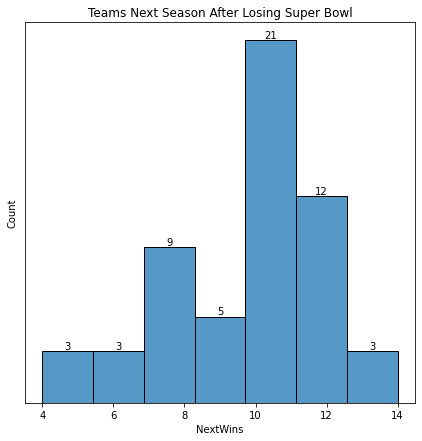

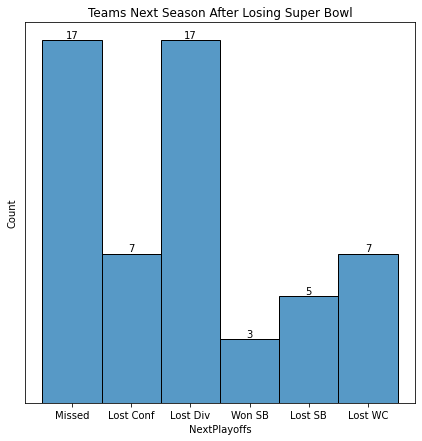

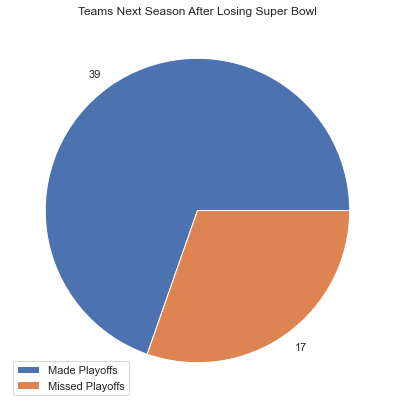

In [17]:
import seaborn
from matplotlib import pyplot

EDA_Data = sb_losers[sb_losers['NextSeason'] != 2023]

pyplot.figure(figsize = (7,7))
plot = seaborn.histplot(x = EDA_Data.NextWins)
plot.bar_label(plot.containers[1])
pyplot.yticks([])
pyplot.title('Teams Next Season After Losing Super Bowl')
pyplot.show()

pyplot.figure(figsize = (7,7))
plot = seaborn.histplot(x = EDA_Data.NextPlayoffs)
plot.bar_label(plot.containers[1])
pyplot.yticks([])
pyplot.title('Teams Next Season After Losing Super Bowl')
pyplot.show()

EDA_Data.insert(column = 'Playoffs_Binary', value = ['Missed Playoffs' if value == 'Missed' else 'Made Playoffs' for value in EDA_Data['NextPlayoffs']], loc = 0)

pie_data = EDA_Data.groupby('Playoffs_Binary').count()[['Season']].rename(columns = {'Season': 'Teams'})

seaborn.set_theme(style = 'white')
pyplot.figure(figsize = (7,7))
pyplot.pie(pie_data['Teams'], labels = pie_data['Teams'])
pyplot.title('Teams Next Season After Losing Super Bowl')
pyplot.legend(pie_data.index)
pyplot.show()

Perhaps ordering the bars in the bar charts will make the graphs more intuitive. We will do that, then regenerate the bar chart.

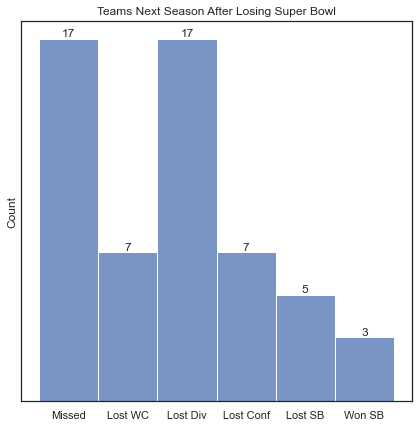

In [18]:
EDA_Data.insert(column = 'NextPlayoffsInt', loc = 0, value = EDA_Data['NextPlayoffs'].replace({ \
                                                                'Missed': 0, \
                                                                'Lost WC': 1, \
                                                                'Lost Div': 2, \
                                                                'Lost Conf': 3, \
                                                                'Lost SB': 4, \
                                                                'Won SB': 5, \
                                                                }))

pyplot.figure(figsize = (7,7))
plot = seaborn.histplot(x = EDA_Data.sort_values('NextPlayoffsInt').NextPlayoffs)
plot.bar_label(plot.containers[1])
pyplot.yticks([])
pyplot.title('Teams Next Season After Losing Super Bowl')
pyplot.xlabel('')
pyplot.show()

Next, we will look at the teams that made it to each round (and beyond) for the Conference Championships and Super Bowl.

In [19]:
print('Teams to Make Conference Championship the Season After Losing Super Bowl')
display(EDA_Data[EDA_Data['NextPlayoffsInt'] >= 3][['NextSeason', 'Team', 'NextPlayoffs']])

print('Teams to Win Super Bowl the Season After Losing Super Bowl')
display(EDA_Data[EDA_Data['NextPlayoffsInt'] == 5][['NextSeason', 'Team', 'NextPlayoffs']])

print('Teams to Lose Super Bowl the Season After Losing Super Bowl')
display(EDA_Data[EDA_Data['NextPlayoffsInt'] == 4][['NextSeason', 'Team', 'NextPlayoffs']])

print('Teams to Lose in Conference Championship Game the Season After Losing Super Bowl')
display(EDA_Data[EDA_Data['NextPlayoffsInt'] == 3][['NextSeason', 'Team', 'NextPlayoffs']])

Teams to Make Conference Championship the Season After Losing Super Bowl


,NextSeason,Team,NextPlayoffs
1,1968,Raiders,Lost Conf
4,1971,Cowboys,Won SB
5,1972,Dolphins,Won SB
7,1974,Vikings,Lost SB
10,1977,Vikings,Lost Conf
18,1985,Dolphins,Lost Conf
20,1987,Broncos,Lost SB
24,1991,Bills,Lost SB
25,1992,Bills,Lost SB
26,1993,Bills,Lost SB


Teams to Win Super Bowl the Season After Losing Super Bowl


,NextSeason,Team,NextPlayoffs
4,1971,Cowboys,Won SB
5,1972,Dolphins,Won SB
51,2018,Patriots,Won SB


Teams to Lose Super Bowl the Season After Losing Super Bowl


,NextSeason,Team,NextPlayoffs
7,1974,Vikings,Lost SB
20,1987,Broncos,Lost SB
24,1991,Bills,Lost SB
25,1992,Bills,Lost SB
26,1993,Bills,Lost SB


Teams to Lose in Conference Championship Game the Season After Losing Super Bowl


,NextSeason,Team,NextPlayoffs
1,1968,Raiders,Lost Conf
10,1977,Vikings,Lost Conf
18,1985,Dolphins,Lost Conf
45,2012,Patriots,Lost Conf
46,2013,49ers,Lost Conf
54,2021,Chiefs,Lost Conf
55,2022,Bengals,Lost Conf


Now, we will look at the percentage of teams by their playoff success.

In [20]:
for i in range(6):
    playoffs = EDA_Data[EDA_Data['NextPlayoffsInt'] == i]['NextPlayoffs'].max()
    count = EDA_Data[EDA_Data['NextPlayoffsInt'] == i]['NextPlayoffs'].count()
    rows = len(EDA_Data)
    print(playoffs, '---', round((count/rows)*100,2), '%')

Missed --- 30.36 %
Lost WC --- 12.5 %
Lost Div --- 30.36 %
Lost Conf --- 12.5 %
Lost SB --- 8.93 %
Won SB --- 5.36 %


That is interesting, but it is probably more interesting to look at what percentage of teams made it to the corresponding round OR FURTHER. \
We will redo this analysis with that method instead.

In [21]:
EDA_Data.insert(column = 'Made_Playoffs', loc = 0, value = [1 if row >= 1 else 0 for row in EDA_Data['NextPlayoffsInt']])
EDA_Data.insert(column = 'Made_Divisional_Round', loc = 0, value = [1 if row >= 2 else 0 for row in EDA_Data['NextPlayoffsInt']])
EDA_Data.insert(column = 'Made_Conference_Championship', loc = 0, value = [1 if row >= 3 else 0 for row in EDA_Data['NextPlayoffsInt']])
EDA_Data.insert(column = 'Made_Super_Bowl', loc = 0, value = [1 if row >= 4 else 0 for row in EDA_Data['NextPlayoffsInt']])
EDA_Data.insert(column = 'Won_Super_Bowl', loc = 0, value = [1 if row == 5 else 0 for row in EDA_Data['NextPlayoffsInt']])

In [22]:
for i in range(1,6):
    if i == 1: 
        playoffs = 'Made_Playoffs'
        count = EDA_Data[playoffs].sum()
    elif i == 2:
        playoffs = 'Made_Divisional_Round'
        count = EDA_Data[playoffs].sum()
    elif i == 3:
        playoffs = 'Made_Conference_Championship'
        count = EDA_Data[playoffs].sum()
    elif i == 4:
        playoffs = 'Made_Super_Bowl'
        count = EDA_Data[playoffs].sum()
    elif i == 5:
        playoffs = 'Won_Super_Bowl'
        count = EDA_Data[playoffs].sum()
    rows = len(EDA_Data)
    print(playoffs, '---', round((count/rows)*100,2), '%')

Made_Playoffs --- 69.64 %
Made_Divisional_Round --- 57.14 %
Made_Conference_Championship --- 26.79 %
Made_Super_Bowl --- 14.29 %
Won_Super_Bowl --- 5.36 %


Next, we will take the focus off of only the Super Bowl losing teams and look at all available data for each team starting at the season of the first Super Bowl. \
Here, we will look at each team and their corresponding number of Super Bowls won, number of seasons played in the Super Bowl era, and percentage of those seasons that resulted in a Super Bowl victory.

In [23]:
sb_team_seasons = team_seasons[team_seasons['Year'] >= super_bowl_data.Season.min()]

sb_chances = pandas.concat([ \
                            sb_losers[sb_losers['NextPlayoffs'] == 'Won SB'][['Playoffs', 'Year']].rename(columns = {'Playoffs': 'Team'}), \
                            sb_team_seasons[sb_team_seasons['Playoffs'] == 'Won SB'][['Team', 'Year']] \
                            ]).replace({'Lost SB': 'Super Bowl Losers'}).groupby('Team').count().rename(columns = {'Year': 'Super_Bowls'})

sb_chances['Seasons'] = [len(sb_losers[sb_losers['NextYear'] != 0]) if team == 'Super Bowl Losers' \
                            else sb_team_seasons[sb_team_seasons['Team'] == team]['Team'].count() for team in sb_chances.index]

sb_chances['%_Super_Bowls'] = round((sb_chances['Super_Bowls'] / sb_chances['Seasons'])*100, 2)

sb_chances

,Super_Bowls,Seasons,%_Super_Bowls
Team,,,
49ers,5,57,8.77
Bears,1,57,1.75
Broncos,3,57,5.26
Buccaneers,2,47,4.26
Chiefs,3,57,5.26
Colts,2,57,3.51
Commanders,3,57,5.26
Cowboys,5,57,8.77
Dolphins,2,57,3.51


This will now be visualized in bar graphs to show how Super Bowl losers compare to the 32 teams in terms of Super Bowl wins and percent of seasons resulting in a Super Bowl win. \
First, we will order by raw number of Super Bowls, then we will order by the percentage. The "Super Bowl Losers" bar will be a different color than the other bars to make it more apparent.

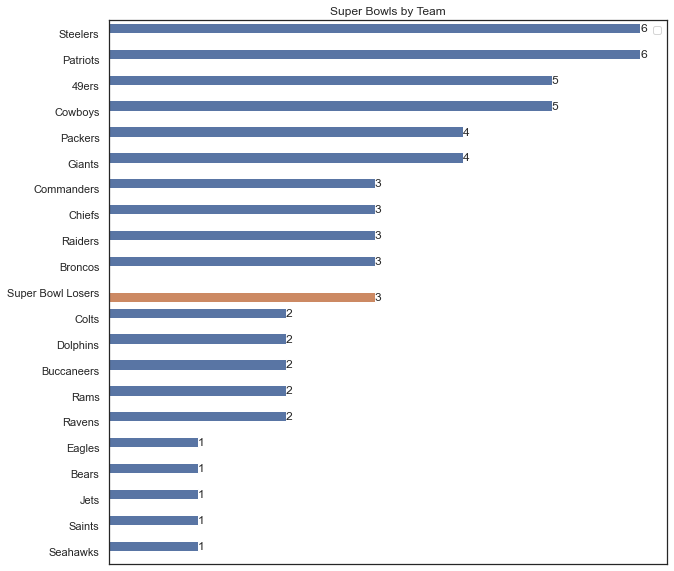

,Super_Bowls,Seasons,%_Super_Bowls,Hue
Team,,,,
Steelers,6,57,10.53,0
Patriots,6,57,10.53,0
49ers,5,57,8.77,0
Cowboys,5,57,8.77,0
Packers,4,57,7.02,0
Giants,4,57,7.02,0
Commanders,3,57,5.26,0
Chiefs,3,57,5.26,0
Raiders,3,57,5.26,0


In [24]:
pyplot.figure(figsize = (10,10))
sb_chances = sb_chances.sort_values('Super_Bowls', ascending = False)
sb_chances['Hue'] = [1 if team == 'Super Bowl Losers' else 0 for team in sb_chances.index]
plot = seaborn.barplot(y = sb_chances.index, x = sb_chances.Super_Bowls, hue = sb_chances.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Super Bowls by Team')
pyplot.legend([])
pyplot.show()

sb_chances

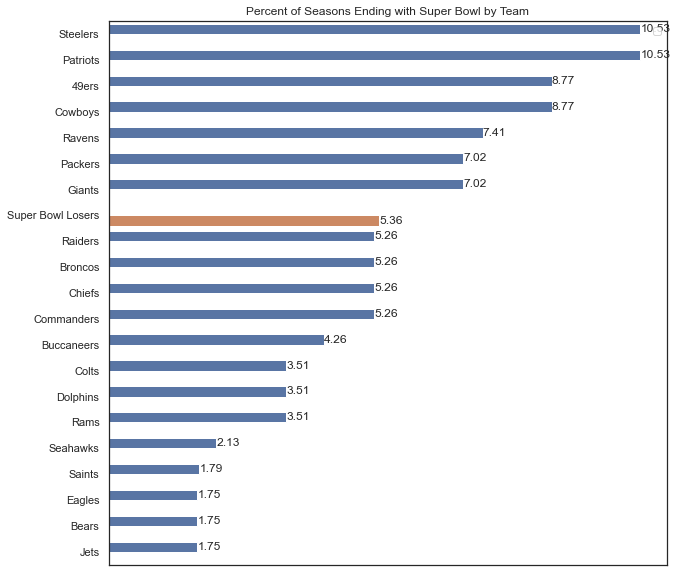

,Super_Bowls,Seasons,%_Super_Bowls,Hue
Team,,,,
Steelers,6,57,10.53,0
Patriots,6,57,10.53,0
49ers,5,57,8.77,0
Cowboys,5,57,8.77,0
Ravens,2,27,7.41,0
Packers,4,57,7.02,0
Giants,4,57,7.02,0
Super Bowl Losers,3,56,5.36,1
Raiders,3,57,5.26,0


In [25]:
pyplot.figure(figsize = (10,10))
sb_chances = sb_chances.sort_values('%_Super_Bowls', ascending = False)
plot = seaborn.barplot(y = sb_chances.index, x = sb_chances['%_Super_Bowls'], hue = sb_chances.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Percent of Seasons Ending with Super Bowl by Team')
pyplot.legend([])
pyplot.show()

sb_chances

In [26]:
conf_chances = pandas.concat([ \
                            sb_losers[sb_losers['NextPlayoffs'] == 'Won SB'][['Playoffs', 'Year']].rename(columns = {'Playoffs': 'Team'}), \
                            sb_losers[sb_losers['NextPlayoffs'] == 'Lost SB'][['Playoffs', 'Year']].rename(columns = {'Playoffs': 'Team'}), \
                            sb_team_seasons[sb_team_seasons['Playoffs'] == 'Won SB'][['Team', 'Year']], \
                            sb_team_seasons[sb_team_seasons['Playoffs'] == 'Lost SB'][['Team', 'Year']] \
                            ]).replace({'Lost SB': 'Super Bowl Losers'}).groupby('Team').count().rename(columns = {'Year': 'Conference_Champs'})

conf_chances['Seasons'] = [len(sb_losers[sb_losers['NextYear'] != 0]) if team == 'Super Bowl Losers' \
                            else sb_team_seasons[sb_team_seasons['Team'] == team]['Team'].count() for team in conf_chances.index]

conf_chances['%_Conference_Champs'] = round((conf_chances['Conference_Champs'] / conf_chances['Seasons'])*100, 2)

conf_chances

,Conference_Champs,Seasons,%_Conference_Champs
Team,,,
49ers,7,57,12.28
Bears,2,57,3.51
Bengals,3,55,5.45
Bills,4,57,7.02
Broncos,8,57,14.04
Buccaneers,2,47,4.26
Cardinals,1,57,1.75
Chargers,1,57,1.75
Chiefs,5,57,8.77


We will now do the analysis for Super Bowl appearances.

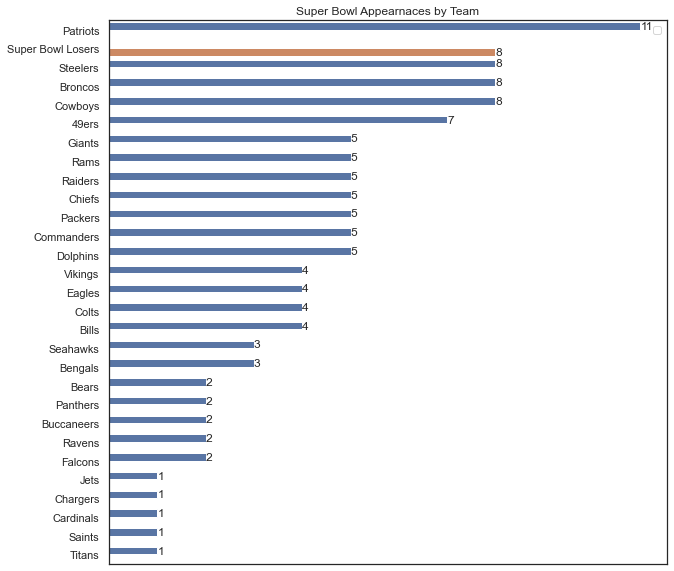

,Conference_Champs,Seasons,%_Conference_Champs,Hue
Team,,,,
Patriots,11,57,19.30,0
Super Bowl Losers,8,56,14.29,1
Steelers,8,57,14.04,0
Broncos,8,57,14.04,0
Cowboys,8,57,14.04,0
49ers,7,57,12.28,0
Giants,5,57,8.77,0
Rams,5,57,8.77,0
Raiders,5,57,8.77,0


In [27]:
pyplot.figure(figsize = (10,10))
conf_chances = conf_chances.sort_values('Conference_Champs', ascending = False)
conf_chances['Hue'] = [1 if team == 'Super Bowl Losers' else 0 for team in conf_chances.index]
plot = seaborn.barplot(y = conf_chances.index, x = conf_chances.Conference_Champs, hue = conf_chances.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Super Bowl Appearnaces by Team')
pyplot.legend([])
pyplot.show()

conf_chances

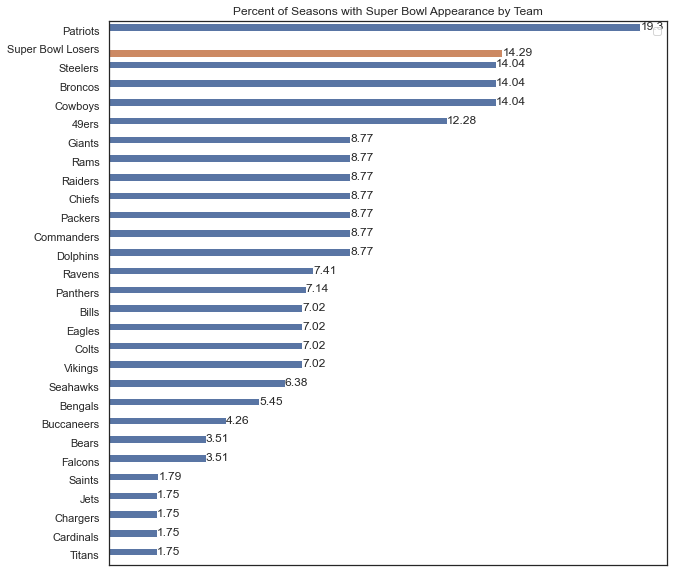

,Conference_Champs,Seasons,%_Conference_Champs,Hue
Team,,,,
Patriots,11,57,19.30,0
Super Bowl Losers,8,56,14.29,1
Steelers,8,57,14.04,0
Broncos,8,57,14.04,0
Cowboys,8,57,14.04,0
49ers,7,57,12.28,0
Giants,5,57,8.77,0
Rams,5,57,8.77,0
Raiders,5,57,8.77,0


In [28]:
pyplot.figure(figsize = (10,10))
conf_chances = conf_chances.sort_values('%_Conference_Champs', ascending = False)
plot = seaborn.barplot(y = conf_chances.index, x = conf_chances['%_Conference_Champs'], hue = conf_chances.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Percent of Seasons with Super Bowl Appearance by Team')
pyplot.legend([])
pyplot.show()

conf_chances

Wow! It looks like teams that lost the Super Bowl historically have performed the next season about as good as any given team in the league, with the exception on Tom Brady's 9 Super Bowl appearnaces with the Partiots skewing the results. It seems that losing the Super Bowl does not necessarily hurt a team as much as simply the small chances of getting to to the Super Bowl in any given season.

----------End of Explore----------

Model

Now we are ready to begin modeling! Predictions will be made on the performance of teams for the upcoming 2023 season regarding metrics such as wins, playoff success, offensive ranking, and more. \
The models used will all be from SciKit Learn, specifically K-Means Clustering, Multinomial Naive Bayes, Decision Trees, Support Vector Machines with a RBF kernel, and Support Vector Machines with a linear kernel. \
First, we will need to import the algorithm functions for each of these.

In [29]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

Next, we will create a function that will allow training models on the Super Bowl losers data. \
The training accuracy will be calculated and optionally displayed, then a prediction for the specified metric will be returned.

In [30]:
def sb_losers_prediction(data, model, predict_col, predict_row = None, print_train_score = True):

    sb_losers_model_data = data
    predict_col = predict_col
    if predict_row == None: predict_row = len(sb_losers_model_data) - 1

    for col in sb_losers_model_data.columns:
        if sb_losers_model_data.dtypes[col] != int and col != predict_col:
            sb_losers_model_data[col] = pandas.Categorical(sb_losers_model_data[col]).codes

    train = sb_losers_model_data.iloc[:predict_row , :]
    test = sb_losers_model_data.drop(columns = [predict_col]).iloc[predict_row , :]
    model.fit(train.drop(columns = [predict_col]).values, train[predict_col])

    train_score = model.score(train.drop(columns = [predict_col]).values, train[predict_col])
    if print_train_score: print('TRAINING ACCURACY:', round(train_score*100,2), '%')
    
    return(model.predict(test.to_numpy().reshape(1,-1))[0])

Now, we will use the function to predict the playoff success of the Eagles this upcoming season. This will also allow us to see which model is the most accurate of the five we are working with.

In [31]:
sb_losers_model_data = sb_losers.drop(columns = [col for col in sb_losers.columns if col != 'NextPlayoffs' and col[:4] == 'Next'])

#KMeans
print('K-Means Clustering')
print(sb_losers_prediction(data = sb_losers_model_data, model = KMeans(), predict_col = 'NextPlayoffs'))

#MultinomialNB
print()
print('Multinomial Naive Bayes')
print(sb_losers_prediction(data = sb_losers_model_data, model = MultinomialNB(), predict_col = 'NextPlayoffs'))

#DecisionTreeClassifier
print()
print('Decision Tree')
print(sb_losers_prediction(data = sb_losers_model_data, model = DecisionTreeClassifier(), predict_col = 'NextPlayoffs'))

#SVC
print()
print('SVC')
print(sb_losers_prediction(data = sb_losers_model_data, model = SVC(), predict_col = 'NextPlayoffs'))

#LinearSVC
print()
print('Linear SVC')
print(sb_losers_prediction(data = sb_losers_model_data, model = LinearSVC(), predict_col = 'NextPlayoffs'))

K-Means Clustering
TRAINING ACCURACY: -17118284.17 %
1

Multinomial Naive Bayes
TRAINING ACCURACY: 37.5 %
Lost Conf

Decision Tree
TRAINING ACCURACY: 100.0 %
Missed

SVC
TRAINING ACCURACY: 41.07 %
Missed

Linear SVC
TRAINING ACCURACY: 8.93 %
Lost SB


c:\Users\nvidetti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Well, it looks like for the Super Bowl data predicitng the following seasons's playoff success, that the Decision Tree model is the way to go. 

Next, another function will be created. This time, the function will be for using the full team seasons data to predict a specific metric for a specific team in 2023. \
The training accuracy will be optionally printed, and the prediction will be returned.

In [32]:
def prediction_2023(model, data, predict_team, predict_col, print_train_score = True):
    
    data['NextYear'] = data['Year'] + 1
    data = data.merge(data, how = 'left', left_on = ['Team', 'NextYear'], right_on = ['Team', 'Year'])
    data.columns = [column.replace('_x', '') if column[-2:] == '_x' else 'Next' + column.replace('_y', '') if column[-2:] == '_y' else column for column in data.columns]
    
    for col in data.columns:
        if col == 'Year': data['YearCat'] = pandas.Categorical(data['Year']).codes
        elif col == 'Team': data['TeamCat'] = pandas.Categorical(data['Team']).codes
        elif col != predict_col:
            data[col] = pandas.Categorical(data[col]).codes
            
    train = data.drop(columns = [col for col in data.columns if col == 'Year' or col == 'Team' or (col != predict_col and col[:4] == 'Next')]).dropna()

    test = data[(data['Year'] == 2022) & (data['Team'] == predict_team)].drop(columns = [col for col in data.columns if col[:4] == 'Next' or col == 'Year' or col == 'Team'])
    
    model.fit(train.drop(columns = [predict_col]).values, train[predict_col])

    train_score = model.score(train.drop(columns = [predict_col]).values, train[predict_col])
    if print_train_score: print('TRAINING ACCURACY:', round(train_score*100,2), '%')
    
    return(model.predict(test.to_numpy().reshape(1,-1))[0])

Now, we will use the function to predict the playoff success of the Eagles this upcoming season. This will also allow us to see which model is the most accurate of the five we are working with.

In [33]:
#KMeans
print('K-Means Clustering')
print(prediction_2023(model = KMeans(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

#MultinomialNB
print()
print('Multinomial Naive Bayes')
print(prediction_2023(model = MultinomialNB(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

#DecisionTreeClassifier
print()
print('Decision Tree')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

#SVC
print()
print('SVC')
print(prediction_2023(model = SVC(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

#LinearSVC
print()
print('Linear SVC')
print(prediction_2023(model = LinearSVC(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

K-Means Clustering
TRAINING ACCURACY: -944332569.08 %
4

Multinomial Naive Bayes


TRAINING ACCURACY: 44.14 %
Won SB

Decision Tree
TRAINING ACCURACY: 100.0 %
Lost Conf

SVC
TRAINING ACCURACY: 65.85 %
Missed

Linear SVC
TRAINING ACCURACY: 28.36 %
Lost Conf


c:\Users\nvidetti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Much like with the model for the Super Bowl losers data, the Decision Tree models are the way to go! \
For this reason, all remaining modeling will be done using a Decision Tree model.

Now, some more predictions will be made on the Eagles' 2023 season. \
These predictions will use all team seasons data for training, rather than only the Super Bowl losers.

In [34]:
#Playoffs
print('Playoffs')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextPlayoffs'))

#Wins
print()
print('Wins')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextOffRankYds'))

#DefRankPts
print()
print('Defensive Ranking (Points)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = 'NextDefRankPts'))

Playoffs
TRAINING ACCURACY: 100.0 %
Lost Conf

Wins
TRAINING ACCURACY: 100.0 %
9.0

Offensive Ranking (Yards)
TRAINING ACCURACY: 100.0 %
4.0

Defensive Ranking (Points)
TRAINING ACCURACY: 100.0 %
16.0


Repeat for the Chiefs...

In [35]:
#Playoffs
print('Playoffs')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Chiefs', predict_col = 'NextPlayoffs'))

#Wins
print()
print('Wins')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Chiefs', predict_col = 'NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Chiefs', predict_col = 'NextOffRankYds'))

#DefRankPts
print()
print('Defensive Ranking (Points)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Chiefs', predict_col = 'NextDefRankPts'))

Playoffs
TRAINING ACCURACY: 100.0 %
Lost Div

Wins
TRAINING ACCURACY: 100.0 %
12.0

Offensive Ranking (Yards)
TRAINING ACCURACY: 100.0 %
13.0

Defensive Ranking (Points)
TRAINING ACCURACY: 100.0 %
11.0


Repeat for the Bills...

In [36]:
#Playoffs
print('Playoffs')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bills', predict_col = 'NextPlayoffs'))

#Wins
print()
print('Wins')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bills', predict_col = 'NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bills', predict_col = 'NextOffRankYds'))

#DefRankPts
print()
print('Defensive Ranking (Points)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bills', predict_col = 'NextDefRankPts'))

Playoffs
TRAINING ACCURACY: 100.0 %
Lost Conf

Wins


TRAINING ACCURACY: 100.0 %
9.0

Offensive Ranking (Yards)
TRAINING ACCURACY: 100.0 %
16.0

Defensive Ranking (Points)
TRAINING ACCURACY: 100.0 %
7.0


Repeat for the Bengals...

In [37]:
#Playoffs
print('Playoffs')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bengals', predict_col = 'NextPlayoffs'))

#Wins
print()
print('Wins')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bengals', predict_col = 'NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bengals', predict_col = 'NextOffRankYds'))

#DefRankPts
print()
print('Defensive Ranking (Points)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Bengals', predict_col = 'NextDefRankPts'))

Playoffs
TRAINING ACCURACY: 100.0 %
Lost Div

Wins
TRAINING ACCURACY: 100.0 %
7.0

Offensive Ranking (Yards)
TRAINING ACCURACY: 100.0 %
6.0

Defensive Ranking (Points)
TRAINING ACCURACY: 100.0 %
26.0


Repeat once more for the Jets...

In [38]:
#Playoffs
print('Playoffs')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Jets', predict_col = 'NextPlayoffs'))

#Wins
print()
print('Wins')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Jets', predict_col = 'NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Jets', predict_col = 'NextOffRankYds'))

#DefRankPts
print()
print('Defensive Ranking (Points)')
print(prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Jets', predict_col = 'NextDefRankPts'))

Playoffs
TRAINING ACCURACY: 100.0 %
Missed

Wins
TRAINING ACCURACY: 100.0 %
4.0

Offensive Ranking (Yards)
TRAINING ACCURACY: 100.0 %
25.0

Defensive Ranking (Points)
TRAINING ACCURACY: 100.0 %
19.0


Now, a function will be created to predict a metric for all 32 teams. \
This will allow for comparing the metrics and giving a better idea of the season predictions overall.

In [39]:
def metric_preds_2023(metric, asc = False):
    team_preds_list = []
    for team in set(team_seasons.Team):
        team_preds_list.append([team, prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = team, predict_col = metric, print_train_score = False)])

    team_preds = pandas.DataFrame(team_preds_list, columns = ['Team', 'Prediction'])
    
    if metric == 'NextPlayoffs':
        team_preds.insert(column = 'PlayoffsInt', loc = 0, value = team_preds['Prediction'].replace({ \
                                                                        'Missed': 0, \
                                                                        'Lost WC': 1, \
                                                                        'Lost Div': 2, \
                                                                        'Lost Conf': 3, \
                                                                        'Lost SB': 4, \
                                                                        'Won SB': 5, \
                                                                        }))

        team_preds = team_preds.sort_values('PlayoffsInt', ascending = False).drop(columns = ['PlayoffsInt'])

    else: team_preds = team_preds.sort_values('Prediction', ascending = asc)

    return(team_preds)

Now, we will run the function on four different metrics: playoff success, wins, offensive ranking (yards), and defensive ranking (points).

In [40]:
#Playoffs
print('Playoffs')
display(metric_preds_2023('NextPlayoffs'))

#Wins
print()
print('Wins')
display(metric_preds_2023('NextWins'))

#OffRankYds
print()
print('Offensive Ranking (Yards)')
display(metric_preds_2023('NextOffRankYds', asc = True))

#DefRankPts
print()
print('Defensive Ranking (Points)')
display(metric_preds_2023('NextDefRankPts', asc = True))

Playoffs


,Team,Prediction
25,Texans,Lost SB
20,Eagles,Lost Conf
17,Lions,Lost Conf
1,Jaguars,Lost Conf
13,Cowboys,Lost Div
23,Chiefs,Lost Div
7,Colts,Lost Div
15,Bengals,Lost Div
0,Panthers,Lost WC
22,Patriots,Lost WC



Wins


,Team,Prediction
12,49ers,14.0
13,Cowboys,14.0
3,Commanders,13.0
4,Buccaneers,13.0
31,Bills,12.0
21,Dolphins,12.0
5,Seahawks,12.0
23,Chiefs,11.0
11,Packers,11.0
6,Vikings,10.0



Offensive Ranking (Yards)


,Team,Prediction
12,49ers,2.0
6,Vikings,2.0
18,Raiders,3.0
27,Cardinals,4.0
15,Bengals,6.0
31,Bills,6.0
20,Eagles,9.0
17,Lions,9.0
8,Chargers,11.0
21,Dolphins,11.0



Defensive Ranking (Points)


,Team,Prediction
12,49ers,1.0
16,Browns,2.0
22,Patriots,3.0
31,Bills,7.0
27,Cardinals,7.0
2,Falcons,7.0
9,Steelers,7.0
7,Colts,8.0
24,Ravens,9.0
3,Commanders,10.0


Now, rather than predicting a single metric for every team, a function will be created to predict every metric in the team seasons data for a single team.

In [41]:
def team_preds_2023(team):

    pred_cols = ['Next' + col for col in team_seasons if not col in ('Year', 'Team', 'NextYear')]

    preds_list = []
    print(team.upper(), '2023 SEASON PREDICTIONS')
    for col in pred_cols:
        preds_list.append([col[4:], prediction_2023(model = DecisionTreeClassifier(), data = team_seasons, predict_team = 'Eagles', predict_col = col, print_train_score = False)])

    preds = pandas.DataFrame(preds_list, columns = ['Metric', 'Prediction'])

    return(preds)

We will use this function on the Eagles, the Bills, and the Chiefs.

In [42]:
display(team_preds_2023('Eagles'))

display(team_preds_2023('Bills'))

display(team_preds_2023('Chiefs'))

EAGLES 2023 SEASON PREDICTIONS


,Metric,Prediction
0,Wins,9.0
1,Losses,4.0
2,Ties,0.0
3,Div. Finish,2nd of 4
4,Playoffs,Lost Conf
5,PointsFor,482.0
6,PointsAllowed,335.0
7,PointDifferential,127.0
8,OffRankPts,3.0
9,OffRankYds,9.0


BILLS 2023 SEASON PREDICTIONS


,Metric,Prediction
0,Wins,7.0
1,Losses,4.0
2,Ties,0.0
3,Div. Finish,2nd of 4
4,Playoffs,Lost Conf
5,PointsFor,368.0
6,PointsAllowed,335.0
7,PointDifferential,117.0
8,OffRankPts,3.0
9,OffRankYds,9.0


CHIEFS 2023 SEASON PREDICTIONS


,Metric,Prediction
0,Wins,9.0
1,Losses,4.0
2,Ties,0.0
3,Div. Finish,2nd of 4
4,Playoffs,Lost Conf
5,PointsFor,482.0
6,PointsAllowed,335.0
7,PointDifferential,145.0
8,OffRankPts,3.0
9,OffRankYds,9.0


----------End of Model----------

Interpret

The Model step of this project has already unveiled some major flaws in these models. One thing that should have been implemented is constraints on the possible values. \
For example, wins and losses and ties should always sum to the number of games in the season played (17 for 2023). Also, point differentials should always equal the difference of points scored and points allowed. \
Rankings should also be unique for each team unless there are truly ties between the teams with the same rank. \
\
Perhaps not all of these metrics should be predcted together, especially if one affects the other or if one can be found based on the other. \
That all said, let's take a deep dive into the predictions for the Eagles upcoming season.

We will first look at the number of wins predicted for the Eagles compared to the wins predicted amongst all teams for 2023.

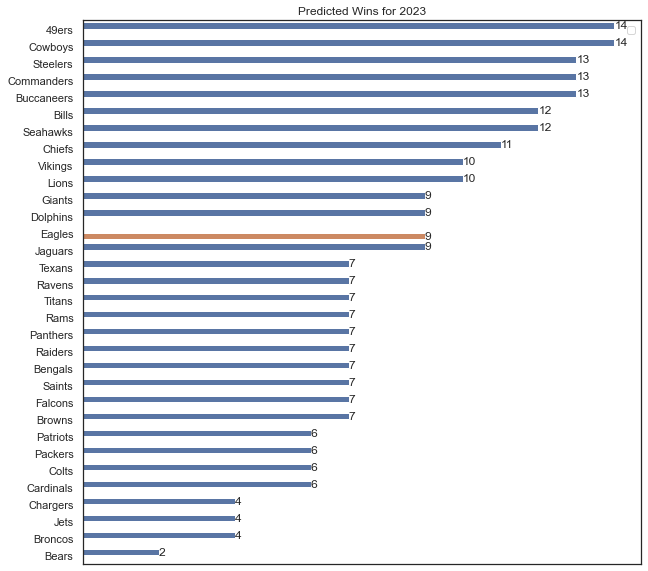

In [43]:
rank_data = metric_preds_2023('NextWins')

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Wins for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Points Scored...

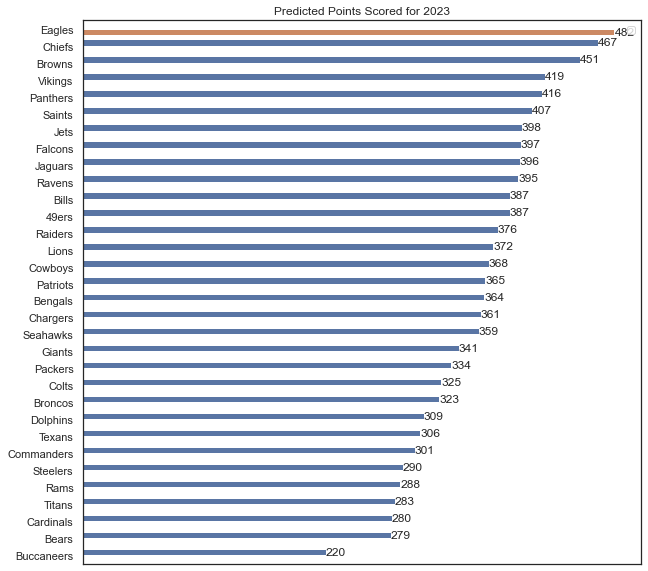

In [44]:
rank_data = metric_preds_2023('NextPointsFor')

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Points Scored for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Points Allowed...

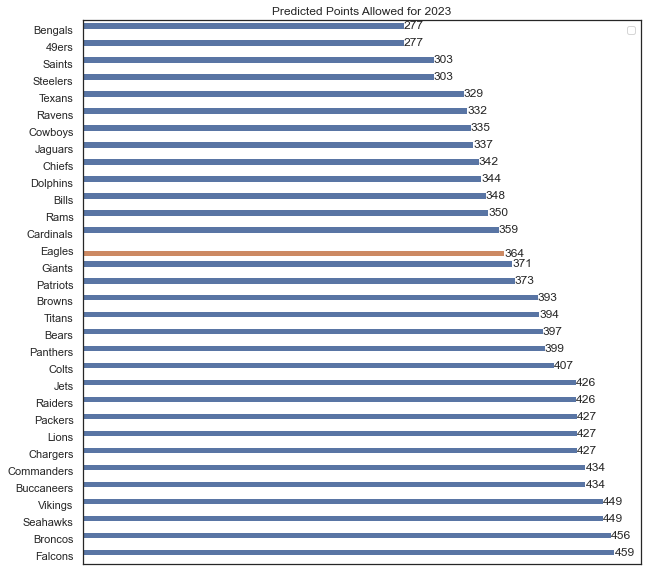

In [45]:
rank_data = metric_preds_2023('NextPointsAllowed', asc = True)

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Points Allowed for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Offensive Ranking (Points)...

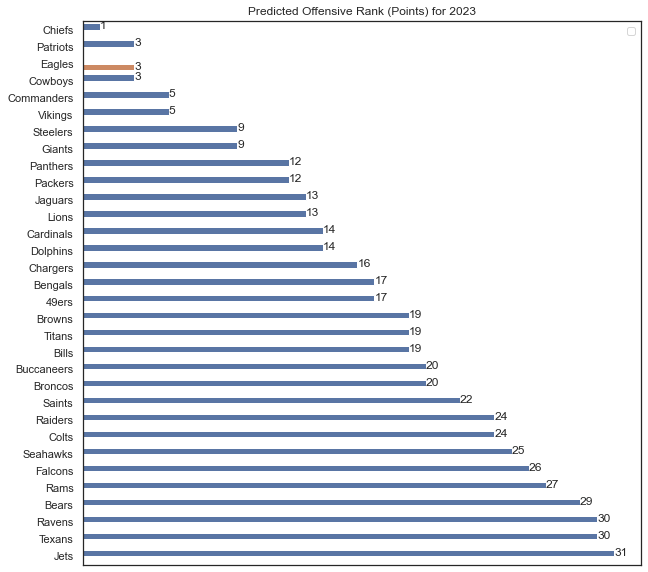

In [46]:
rank_data = metric_preds_2023('NextOffRankPts', asc = True)

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Offensive Rank (Points) for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Offensive Ranking (Yards)...

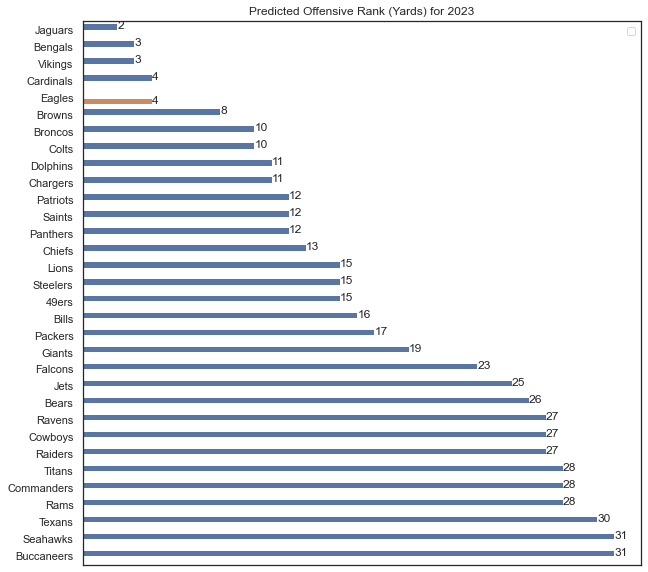

In [47]:
rank_data = metric_preds_2023('NextOffRankYds', asc = True)

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Offensive Rank (Yards) for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Defensive Ranking (Points)...

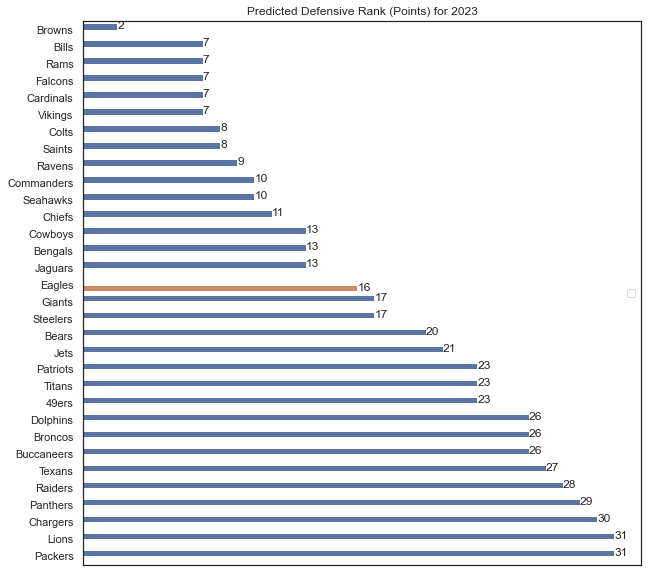

In [48]:
rank_data = metric_preds_2023('NextDefRankPts', asc = True)

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Defensive Rank (Points) for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Defensive Ranking (Yards)...

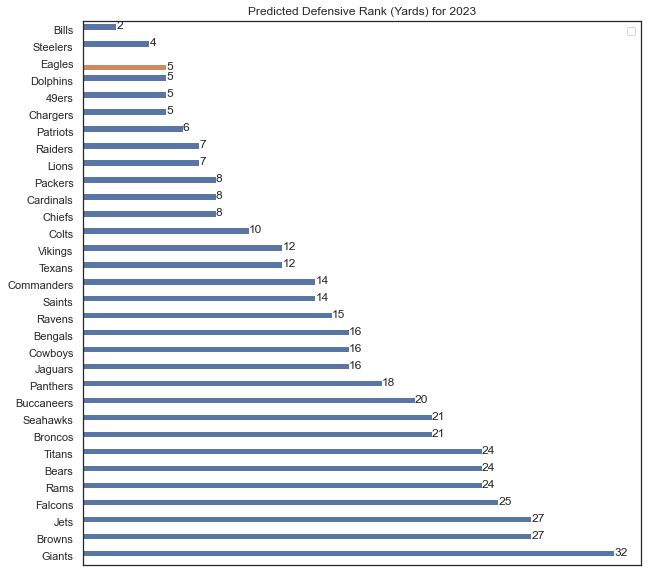

In [49]:
rank_data = metric_preds_2023('NextDefRankYds', asc = True)

pyplot.figure(figsize = (10,10))
rank_data['Hue'] = [1 if team == 'Eagles' else 0 for team in rank_data.Team]
plot = seaborn.barplot(y = rank_data.Team, x = rank_data.Prediction, hue = rank_data.Hue)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.xticks([])
pyplot.xlabel('')
pyplot.ylabel('')
pyplot.title('Predicted Defensive Rank (Yards) for 2023')
pyplot.legend([])
pyplot.show()

Repeat for Playoff Success...

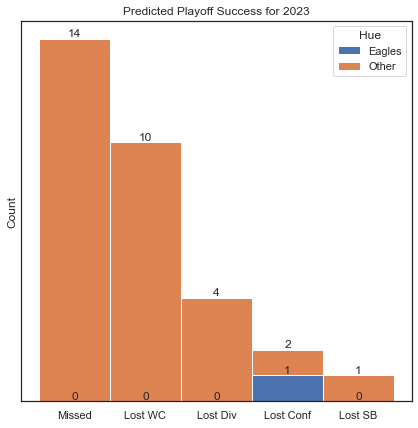

In [50]:
rank_data = metric_preds_2023('NextPlayoffs')

rank_data.insert(column = 'NextPlayoffsInt', loc = 0, value = rank_data.Prediction.replace({ \
                                                                'Missed': 0, \
                                                                'Lost WC': 1, \
                                                                'Lost Div': 2, \
                                                                'Lost Conf': 3, \
                                                                'Lost SB': 4, \
                                                                'Won SB': 5, \
                                                                }))

pyplot.figure(figsize = (7,7))
rank_data['Hue'] = [team if team == 'Eagles' else 'Other' for team in rank_data.Team]
rank_data = rank_data.sort_values('NextPlayoffsInt')
plot = seaborn.histplot(x = rank_data.Prediction, hue = rank_data.Hue, alpha = 1, hue_order = ['Eagles', 'Other'])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
pyplot.yticks([])
pyplot.title('Predicted Playoff Success for 2023')
pyplot.xlabel('')
pyplot.show()

Conclusion: \
\
Results will vary with each run of these models, as they are not very powerful, intuitive, or consistent. \
It is to be seen whether they are accurate, but comparing the results of all predictions does not seem to be the way to test that out. \
It is best to have these models either only predict one metric, or to have them predict a vector of values for predicting multiple metrics. \
This is likely to help with the issues seen in the lack of contraints on precited values, such as wins and losses and ties adding up to 17, points scored minus points allowed equaling point differential, \
only two teams reaching Super Bowl, only one team winning it, only 14 teams making the playoffs, etc. \
Time does not permit these potential improvements, but it would be some great further analysis, not to mention comparing the results to the actual results of the 2023 season.

----------End of Interpret----------

End of Final Project.